# Color Identification in Images 
# Solution By Miss Pranjal Umesh Kalekar

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (168, 300, 3)


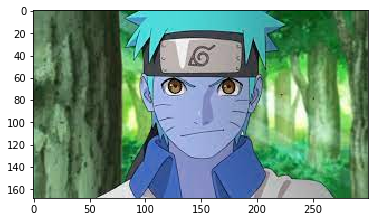

In [21]:
image = cv2.imread('Naruto1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Shape: (168, 300, 3)


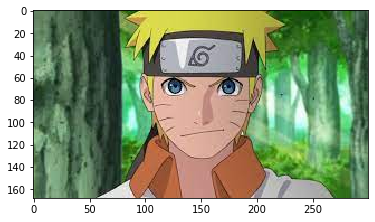

In [22]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Shape: {}".format(image.shape))
plt.imshow(image)

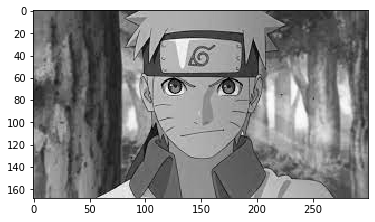

In [23]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Shape: (600, 1200, 3)


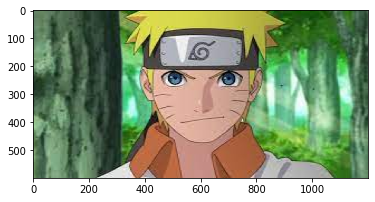

In [24]:
resized_image = cv2.resize(image, (1200, 600))
print("Shape: {}".format(resized_image.shape))
plt.imshow(resized_image)

We’d first define a function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [25]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Next, we define a method that will help us get an image into Python in the RGB space.

In [26]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [28]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([198.61691366, 165.88604522, 156.05123666]),
 array([123.80338516, 188.39421374, 137.14846159]),
 array([ 95.38303723, 148.21795685,  94.79875212]),
 array([200.55970303, 234.45576408, 216.37306661]),
 array([37.88303355, 61.30619543, 36.42931524]),
 array([ 65.45475945, 102.91307041,  61.28131324]),
 array([163.26219218, 100.04200869,  65.81071946]),
 array([198.51158225, 199.53330716,  76.17170527])]

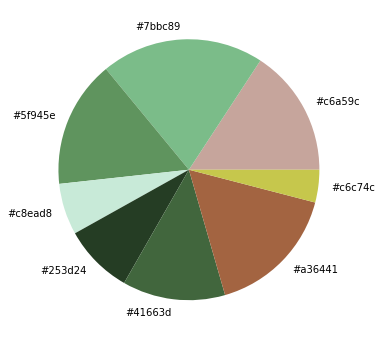

In [29]:
get_colors(get_image('Naruto1.jpg'), 8, True)

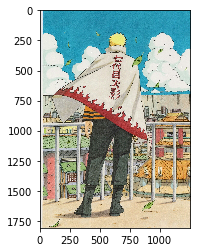

In [32]:
plt.imshow(get_image('Naruto2.jpg'))

[array([220.16658791, 205.67967326, 173.82663876]),
 array([131.11757027, 126.95271897, 104.80467507]),
 array([170.49630871, 170.39566318, 148.54499091]),
 array([227.30452982, 226.89566131, 217.5581422 ]),
 array([208.03846895, 147.29184342,  91.465484  ]),
 array([158.70965909,  76.26439394,  62.87215909]),
 array([70.43950465, 72.23802015, 63.28424737]),
 array([ 41.06545538, 152.41960919, 179.90023997])]

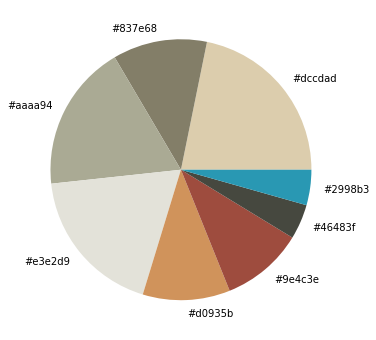

In [30]:
get_colors(get_image('Naruto2.jpg'), 8, True)